<a href="https://colab.research.google.com/github/Sparadrap1101/CryptoFinance/blob/main/MiningGame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We can see that the threshold value from which the honest mining strategy is not the best one starts at 35%.


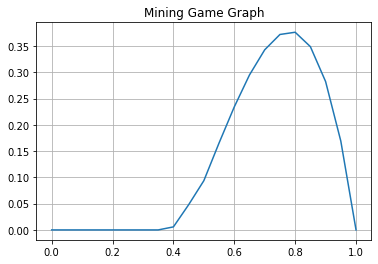

In [42]:
# Author: Alexis Cerio
#
# Subject: We want to simulate a mining game in order to determine if and when the honest mining strategy is not the best one.
# 
#
# Game Process: In this simulation, the attacker will have A tokens, the bank H tokens and actions with some cost can be perform.
# We will have only 3 possible actions : CoinFlip, Override or Abandon. CoinFlip will either gives a token to the attacker or gives a token to the bank 
# with a cost C. Override will cause the bank to lose all its tokens and the attacker to lose H + 1 tokens, but the attacker will gain H + 1 - C €.
# Finally, Abandon will cause both players to lose all their tokens without any cost.
#
# We aim to simulate this mining game and check from which threshold value the honest mining strategy is no longer the best one.

import matplotlib.pyplot as plt
import numpy as np

# We start by making the CoinFlip() function in which we will either give a token to the attacker without cost with probability q, or give
# a token to the bank with cost c and probability 1 - q.
def CoinFlip(a, h, n, q, c):
  return (q * E(a + 1, h, n - 1, q, c) + (1 - q) * (E(a, h + 1, n - 1, q, c) - c))

# We then make the Override function in which the bank loses all its tokens, the attacker loses h + 1 tokens and wins h + 1 - c €.
def Override(a, h, n, q, c):
  return (h + 1 - c + E(a - h - 1, 0, n, q, c))

# Similarly, we make the Abandon function in which both players lose all their tokens without any cost.
def Abandon(a, h, n, q, c):
  return E(0, 0, n - 1, q, c)

# We finish by making the main function in which we will redirect to the previous functions according to the state of the simulation.
def E(a, h, n, q, c):
  # In the case where there are no more possible actions, we return 0.
  if n == 0:
    return 0

  # In the case where the attacker has more tokens than the bank, we return the max between Override() and CoinFlip().
  if a > h:
    return max(Override(a, h, n, q, c), CoinFlip(a, h, n, q, c))
  
  # Finally, in the case where the bank has as many or more tokens than the attacker, we return the max between Abandon() and CoinFlip().
  if a <= h:
    return max(Abandon(a, h, n, q, c), CoinFlip(a, h, n, q, c))

# We then instantiate two value arrays to be able to display the final graph and a variable to determine and display the threshold value.
x = np.arange(0, 1.05, 0.05)
y = []
thresholdBestStrat = 0

# We determine the values of y[] from the previous algorithm.
for q in range(0, 21):
  y.append(E(0, 0, 5, q / 20, q / 20))

  # We retrieve the threshold value and display it.
  thresholdBestStrat = x[q - 1] if (y[q] > 0 and thresholdBestStrat == 0) else thresholdBestStrat

print("We can see that the threshold value from which the honest mining strategy is not the best one starts at " + str(round(thresholdBestStrat * 100)) + "%.")

# We simply end by displaying the curve of our simulation in order to see when the honest mining strategy is not the best one.
plt.plot(x, y)
plt.title("Mining Game Graph")
plt.grid()
plt.show()